In [ ]:
# !git clone https://github.com/hccho2/Tacotron2-Wavenet-Korean-TTS.git

In [ ]:
# import os
# os.chdir('/content/drive/My Drive/Project/TTS_Transfer')
# os.getcwd()
# !git clone https://github.com/TensorSpeech/TensorFlowTTS.git
# os.chdir("TensorFlowTTS")
# !pip install .
# os.chdir("..")

# import sys
# sys.path.append("TensorFlowTTS/")

In [ ]:
import os
os.chdir('/content/drive/My Drive/Project/TTS_audiobook/TensorFlowTTS')
print(os.getcwd())
! pip install TensorFlowTTS

import sys
sys.path.append("TensorFlowTTS/")

/content/drive/My Drive/Project/TTS_audiobook/TensorFlowTTS


In [ ]:
import os
os.chdir('/content/drive/My Drive/Project/TTS_audiobook/TensorFlowTTS')
os.getcwd()
os.listdir()

['ttsexamples',
 '.git',
 'mb.melgan-1000k.h5',
 'docker-compose.yml',
 'dockerfile',
 'README.md',
 'LICENSE',
 '.gitattributes',
 '.github',
 '.gitignore',
 'setup.py',
 'tensorflow_tts',
 'test',
 'preprocess',
 'setup.cfg',
 'dump_book',
 'notebooks',
 'kss_old',
 'kss',
 'dump_test',
 'tacotron2-100k.h5',
 'dump_vocoder',
 'dump_yu',
 'dump_yu_new',
 'kss_mapper.json']

In [ ]:
# from pathlib import Path
# import shutil

# for path in Path(os.getcwd()).rglob('*.py'):
#   flis = list()
#   with open(path,"r") as f:
#     flis = f.readlines()
  
#   rep = open(path,"w")
#   for fl in flis:
#     nuli = fl
#     if "examples." in fl:
#       nuli = nuli.replace("examples.","ttsexamples.")
#       print(nuli.strip())


#     rep.write(nuli)
  
#   rep.close()

# shutil.move("examples","ttsexamples")

In [ ]:
import tensorflow as tf

import pandas as pd
import yaml
import numpy as np
import matplotlib.pyplot as plt

import IPython.display as ipd

from tensorflow_tts.inference import AutoConfig
from tensorflow_tts.inference import TFAutoModel
from tensorflow_tts.inference import AutoProcessor

import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
# 데이터 전처리 
!tensorflow-tts-preprocess --rootdir ./kss --outdir ./dump_yin_40 --config ./preprocess/kss_preprocess.yaml --dataset kss

2020-10-22 14:17:50.628400: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package cmudict to /root/nltk_data...
[nltk_data]   Package cmudict is already up-to-date!
2020-10-22 14:17:54,058 (preprocess:368) INFO: Selected 'kss' processor.
2020-10-22 14:17:54,992 (preprocess:407) INFO: Training items: 2833
2020-10-22 14:17:54,992 (preprocess:408) INFO: Validation items: 150
[Preprocessing train]:   0% 10/2833 [00:52<2:01:22,  2.58s/it]2020-10-22 14:18:47,302 (interpreter:140) DEBUG: label 0:
    x = arg(0, name=x)                       ['x']
    y = arg(1, name=y)                       ['y']
    sample_ratio = arg(2, name=sample_ratio) ['sample_ratio']
    interp_win = arg(3, name=interp_win)     ['interp_win

In [ ]:
# 데이터 Normailizing 
!tensorflow-tts-normalize --rootdir ./dump_yin_40 --outdir ./dump_yin_40 --config ./preprocess/kss_preprocess.yaml --dataset kss

2020-10-22 14:17:23.214109: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package cmudict to /root/nltk_data...
[nltk_data]   Package cmudict is already up-to-date!
Traceback (most recent call last):
  File "/usr/local/bin/tensorflow-tts-normalize", line 8, in <module>
    sys.exit(normalize())
  File "/usr/local/lib/python3.6/dist-packages/tensorflow_tts/bin/preprocess.py", line 512, in normalize
    os.path.join(config["outdir"], "stats.npy")
  File "/usr/local/lib/python3.6/dist-packages/numpy/lib/npyio.py", line 428, in load
    fid = open(os_fspath(file), "rb")
FileNotFoundError: [Errno 2] No such file or directory: './dump_yin_40/stats.npy'
^C


In [ ]:
# 타코트론 학습 
!CUDA_VISIBLE_DEVICES=0 python ./ttsexamples/tacotron2/train_tacotron2.py\
  --train-dir ./dump_book/train/ \
  --dev-dir ./dump_book/valid/ \
  --outdir ./ttsexamples/tacotron2/exp/train.tacotron2.v2/ \
  --config ./ttsexamples/tacotron2/conf/tacotron2.kss.v1.yaml \
  --use-norm 1 \
  --mixed_precision 0 \
  --resume ./ttsexamples/multiband_melgan/exp/train.multiband_melgan.v2/checkpoints/ckpt-3500
# --pretrained ./ttsexamples/tacotron2/exp/train.tacotron2.v1/checkpoints/model-88000.h5

2020-10-22 13:57:48.919841: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
2020-10-22 13:57:50.455927: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcuda.so.1
2020-10-22 13:57:50.465330: E tensorflow/stream_executor/cuda/cuda_driver.cc:314] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2020-10-22 13:57:50.465388: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (41c90c052427): /proc/driver/nvidia/version does not exist
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package cmudict to /root/nltk_data...
[nltk_data]   Package cmudict is already up-to-date!
2020-10-22 13:57:53.354154: I tensorflow/core

In [ ]:
# melgan 학습 
!CUDA_VISIBLE_DEVICES=0 python ./ttsexamples/multiband_melgan/train_multiband_melgan.py\
  --train-dir ./dump_moon/train/ \
  --dev-dir ./dump_moon/valid/ \
  --outdir ./ttsexamples/multiband_melgan/exp/train.multiband_melgan.v1/ \
  --config ./ttsexamples/multiband_melgan/conf/multiband_melgan.v1.yaml \
  --use-norm 1 \
  --generator_mixed_precision 1 \
  --resume ./ttsexamples/multiband_melgan/exp/train.multiband_melgan.v1/checkpoints/ckpt-240000

## Inference

In [ ]:
tacotron2_config = AutoConfig.from_pretrained('/content/drive/My Drive/Project/TTS_audiobook/TensorFlowTTS/ttsexamples/tacotron2/conf/tacotron2.kss.v1.yaml')
tacotron2 = TFAutoModel.from_pretrained(
    config=tacotron2_config,
    pretrained_path="/content/drive/My Drive/Project/TTS_audiobook/TensorFlowTTS/ttsexamples/tacotron2/exp/train.tacotron2.v4/checkpoints/model-86000.h5",
    training=False, 
    name="tacotron2"
)

#  pretrained_path="/content/drive/My Drive/Project/TTS_Transfer/TensorFlowTTS/ttsexamples/tacotron2/exp/train.tacotron2.v1/checkpoints/model-12000.h5

In [ ]:
mb_melgan_config = AutoConfig.from_pretrained('/content/drive/My Drive/Project/TTS/TensorFlowTTS/ttsexamples/multiband_melgan/conf/multiband_melgan.v1.yaml')
mb_melgan = TFAutoModel.from_pretrained(
    config=mb_melgan_config,
    pretrained_path="/content/drive/My Drive/Project/TTS_YIN/TensorFlowTTS/ttsexamples/multiband_melgan/exp/train.multiband_melgan.v1/checkpoints/generator-360000.h5",
    name="mb_melgan"
)

In [ ]:
processor = AutoProcessor.from_pretrained(pretrained_path="/content/drive/My Drive/Project/TTS_audiobook/TensorFlowTTS/dump_yu_new/kss_mapper.json")

In [ ]:
processor

KSSProcessor(data_dir=None, symbols=[], speakers_map={'kss': 0}, train_f_name='transcript.v.1.4.txt', delimiter='|', f_extension='.wav', saved_mapper_path=None, loaded_mapper_path='/content/drive/My Drive/Project/TTS_audiobook/TensorFlowTTS/dump_yu_new/kss_mapper.json', items=[], symbol_to_id={'pad': 0, '-': 7, '!': 2, "'": 3, '(': 4, ')': 5, ',': 6, '.': 8, ':': 9, ';': 10, '?': 11, ' ': 12, 'ᄀ': 13, 'ᄁ': 14, 'ᄂ': 15, 'ᄃ': 16, 'ᄄ': 17, 'ᄅ': 18, 'ᄆ': 19, 'ᄇ': 20, 'ᄈ': 21, 'ᄉ': 22, 'ᄊ': 23, 'ᄋ': 24, 'ᄌ': 25, 'ᄍ': 26, 'ᄎ': 27, 'ᄏ': 28, 'ᄐ': 29, 'ᄑ': 30, 'ᄒ': 31, 'ᅡ': 32, 'ᅢ': 33, 'ᅣ': 34, 'ᅤ': 35, 'ᅥ': 36, 'ᅦ': 37, 'ᅧ': 38, 'ᅨ': 39, 'ᅩ': 40, 'ᅪ': 41, 'ᅫ': 42, 'ᅬ': 43, 'ᅭ': 44, 'ᅮ': 45, 'ᅯ': 46, 'ᅰ': 47, 'ᅱ': 48, 'ᅲ': 49, 'ᅳ': 50, 'ᅴ': 51, 'ᅵ': 52, 'ᆨ': 53, 'ᆩ': 54, 'ᆪ': 55, 'ᆫ': 56, 'ᆬ': 57, 'ᆭ': 58, 'ᆮ': 59, 'ᆯ': 60, 'ᆰ': 61, 'ᆱ': 62, 'ᆲ': 63, 'ᆳ': 64, 'ᆴ': 65, 'ᆵ': 66, 'ᆶ': 67, 'ᆷ': 68, 'ᆸ': 69, 'ᆹ': 70, 'ᆺ': 71, 'ᆻ': 72, 'ᆼ': 73, 'ᆽ': 74, 'ᆾ': 75, 'ᆿ': 76, 'ᇀ': 77, 'ᇁ': 78, 'ᇂ': 79, '

In [ ]:
def do_synthesis(input_text, text2mel_model, vocoder_model, text2mel_name, vocoder_name):
  input_ids = processor.text_to_sequence(input_text)

  # text2mel part
  if text2mel_name == "TACOTRON":
    _, mel_outputs, stop_token_prediction, alignment_history = text2mel_model.inference(
        tf.expand_dims(tf.convert_to_tensor(input_ids, dtype=tf.int32), 0),
        tf.convert_to_tensor([len(input_ids)], tf.int32),
        tf.convert_to_tensor([0], dtype=tf.int32)
    )
  elif text2mel_name == "FASTSPEECH2":
    mel_before, mel_outputs, duration_outputs, _, _ = text2mel_model.inference(
        tf.expand_dims(tf.convert_to_tensor(input_ids, dtype=tf.int32), 0),
        speaker_ids=tf.convert_to_tensor([0], dtype=tf.int32),
        speed_ratios=tf.convert_to_tensor([1.0], dtype=tf.float32),
        f0_ratios=tf.convert_to_tensor([1.0], dtype=tf.float32),
        energy_ratios=tf.convert_to_tensor([1.0], dtype=tf.float32),
    )
  else:
    raise ValueError("Only TACOTRON, FASTSPEECH2 are supported on text2mel_name")

  # vocoder part
  if vocoder_name == "MB-MELGAN":
    audio = vocoder_model.inference(mel_outputs)[0, :, 0]
  else:
    raise ValueError("Only MB_MELGAN are supported on vocoder_name")

  if text2mel_name == "TACOTRON":
    return mel_outputs.numpy(), alignment_history.numpy(), audio.numpy()
  else:
    return mel_outputs.numpy(), audio.numpy()

def visualize_attention(alignment_history):
  import matplotlib.pyplot as plt

  fig = plt.figure(figsize=(8, 6))
  ax = fig.add_subplot(111)
  ax.set_title(f'Alignment steps')
  im = ax.imshow(
      alignment_history,
      aspect='auto',
      origin='lower',
      interpolation='none')
  fig.colorbar(im, ax=ax)
  xlabel = 'Decoder timestep'
  plt.xlabel(xlabel)
  plt.ylabel('Encoder timestep')
  plt.tight_layout()
  plt.show()
  plt.close()

def visualize_mel_spectrogram(mels):
  mels = tf.reshape(mels, [-1, 80]).numpy()
  fig = plt.figure(figsize=(10, 8))
  ax1 = fig.add_subplot(311)
  ax1.set_title(f'Predicted Mel-after-Spectrogram')
  im = ax1.imshow(np.rot90(mels), aspect='auto', interpolation='none')
  fig.colorbar(mappable=im, shrink=0.65, orientation='horizontal', ax=ax1)
  plt.show()
  plt.close()

In [ ]:
input_text = "뭐하는 거니 너 지금"

In [ ]:
tf.expand_dims(tf.convert_to_tensor(input_ids, dtype=tf.int32), 0)

<tf.Tensor: shape=(1, 22), dtype=int32, numpy=
array([[19, 46, 31, 32, 15, 50, 56, 12, 13, 36, 15, 52, 12, 15, 36, 12,
        25, 52, 13, 50, 68, 80]], dtype=int32)>

In [ ]:
tacotron2.inference(tf.expand_dims(tf.convert_to_tensor(input_ids, dtype=tf.int32), 0), tf.convert_to_tensor([len(input_ids)], tf.int32), tf.convert_to_tensor([0], dtype=tf.int32))

(<tf.Tensor: shape=(1, 355, 80), dtype=float32, numpy=
 array([[[-1.0600663e+00, -1.3119069e+00, -1.6179229e+00, ...,
          -6.9799107e-01, -7.6736498e-01, -8.1599849e-01],
         [-9.1997904e-01, -1.2726667e+00, -1.4780843e+00, ...,
          -5.0474691e-01, -5.9137231e-01, -7.6684493e-01],
         [-9.3313801e-01, -1.2640606e+00, -1.5070462e+00, ...,
          -5.0216967e-01, -4.5160884e-01, -6.1979234e-01],
         ...,
         [-3.4844168e-03, -1.1045693e-02,  2.4545498e-02, ...,
          -2.3268787e-02,  3.0287808e-02, -1.9128578e-02],
         [ 5.7895422e-02,  2.0526769e-02,  5.6222491e-02, ...,
           6.4743571e-03,  2.2370655e-02,  1.6728329e-02],
         [ 4.1993283e-02,  3.4102771e-02,  8.0590732e-03, ...,
          -5.0700083e-04, -1.3667299e-02,  9.1666998e-03]]], dtype=float32)>,
 <tf.Tensor: shape=(1, 355, 80), dtype=float32, numpy=
 array([[[-8.6206913e-02, -5.4485393e-01, -1.2055757e+00, ...,
          -3.3214334e-01, -2.1968710e-01, -3.4725127e-01],
   

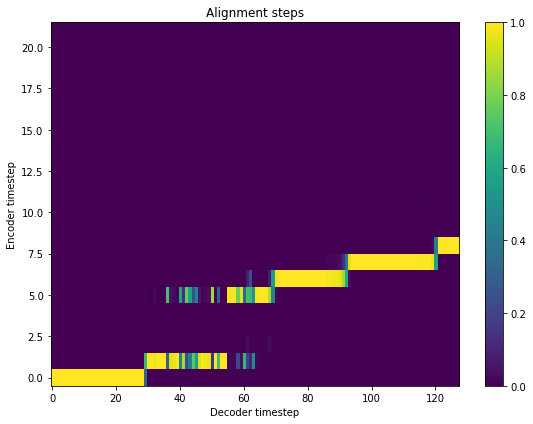

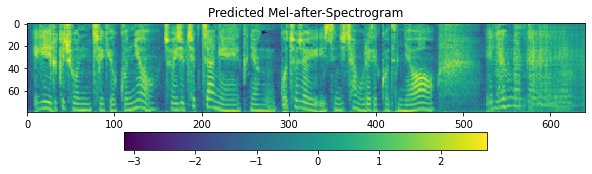

In [ ]:
mels, alignment_history, audios = do_synthesis(input_text, tacotron2, mb_melgan, "TACOTRON", "MB-MELGAN")
visualize_attention(alignment_history[0])
visualize_mel_spectrogram(mels[0])
ipd.Audio(audios, rate=22050)